# Control 1
# Nombre de equipo: KND

## 1. Realice un análisis exploratorio de los datos *Prestigio de las Ocupaciones Canadienses*. ¿Hay algún o algunos detalles que le llamen la atención?

In [1]:
# Importación de librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leer los datos del archivo `control1.dat` cuyas columnas están separadas por múltiples espacios.
df = pd.read_csv('control1.dat', sep='\s+')

Primero, hacemos una inspección del conjunto de datos para observar con qué datos trabajamos.

In [3]:
df.head()

,ocupacion,educacion,ingreso,mujeres,prestigio,censo,tipo
0,GOV.ADMINISTRATORS,13.11,12351,11.16,68.8,1113,prof
1,GENERAL.MANAGERS,12.26,25879,4.02,69.1,1130,prof
2,ACCOUNTANTS,12.77,9271,15.70,63.4,1171,prof
3,PURCHASING.OFFICERS,11.42,8865,9.11,56.8,1175,prof
4,CHEMISTS,14.62,8403,11.68,73.5,2111,prof


In [4]:
# Reetiquetar las variables
df.columns = ["Ocupación", "Educación", "Ingreso", "Mujeres", "Prestigio", "Censo", "Tipo"]

In [5]:
# Ver cuántas entradas hay en el juego de datos
print(f" Número de filas en el juego de datos: {len(df.index)}")

 Número de filas en el juego de datos: 102


In [6]:
# Ver cuántos valores diferentes toma la variable `Ocupación`
print('Ocupaciones diferentes: ', len(df["Ocupación"].unique()))

Ocupaciones diferentes:  102


Como el conjunto de datos tiene 102 entradas y el arreglo `df["Ocupación"].unique()` tiene una longitud de 102 elementos, se concluye que no hay ocupaciones repetidas.

In [7]:
# Ver cuántos valores diferentes toma la variable `Censo`
print('Valores diferentes de la variable censo: ', len(df["Censo"].unique()))

Valores diferentes de la variable censo:  101


En el caso de la variable `Censo` notamos que hay 101 entradas únicas, por lo que encontramos la entrada que se repite y notamos que, a excepción de `Prestigio`, los valores de todas las variables son idénticos.

In [8]:
import collections
a = [item for item, count in collections.Counter(df["Censo"]).items() if count > 1]

print(df[df["Censo"].isin(a)])

         Ocupación  Educación  Ingreso  Mujeres  Prestigio  Censo Tipo
70  SLAUGHTERERS.1       7.64     5134    17.26       25.2   8215   bc
71  SLAUGHTERERS.2       7.64     5134    17.26       34.8   8215   bc


La variable `Censo` parece ser una variable para la identificación de las entradas en el censo sin un significado numérico verdadero, por lo que decidimos no incluirla en el análisis y utilizarla para identificar las entradas en el conjunto de datos con los valores de esta variable.

In [9]:
# Hacer que la numeración de entradas del DataFrame tome los valores de la variable `Censo` y quitar esta última columna
df.index = df["Censo"]
df.drop(["Censo"], axis = 1, inplace = True)

Vemos, además, que la variable `Tipo` tiene tres valores diferentes y que hay también campos en los que se encuentra vacía.

In [10]:
#Ver cuántos valores diferentes toma la variable `Tipo`
#print(len(df["Tipo"].unique()))
print(df["Tipo"].unique())

['prof' 'bc' 'wc' nan]


In [11]:
#Reetiquetar los tipos de ocupaciones.
df.loc[df["Tipo"] == "prof", "Tipo"] = "Profesional, gerencial y técnico"
df.loc[df["Tipo"] == "bc", "Tipo"] = "Obrero"
df.loc[df["Tipo"] == "wc", "Tipo"] = "Oficinista"

Solamente el 3.9216 % de entradas en el juego de datos tiene un valor nulo en el campo `Tipo`

In [12]:
display(df.isnull().sum() / len(df))

Ocupación    0.000000
Educación    0.000000
Ingreso      0.000000
Mujeres      0.000000
Prestigio    0.000000
Tipo         0.039216
dtype: float64

Ahora, vamos a imprimir las estadísticas principales de las variables numéricas.

In [13]:
display(df.describe(percentiles =[.1, 0.25, .5, .75,0.9]).drop('count'))

,Educación,Ingreso,Mujeres,Prestigio
mean,10.738039,6797.901961,28.979020,46.833333
std,2.728444,4245.922227,31.724931,17.204486
min,6.380000,611.000000,0.000000,14.800000
10%,7.522000,3026.000000,0.783000,25.920000
25%,8.445000,4106.000000,3.592500,35.225000
50%,10.540000,5930.500000,13.600000,43.600000
75%,12.647500,8187.250000,52.202500,59.275000
90%,14.703000,11029.300000,82.104000,71.820000
max,15.970000,25879.000000,97.510000,87.200000


Es interesante notar que las ocupaciones con mayor porcentaje de mujeres son aquellas que tradicionalmente se han considerado como "ocupaciones femeninas", tal como secretarias, niñeras y enfermeras. Además, estas ocupaciones tienen un prestigio relativamente bajo. 

In [14]:
df[df["Mujeres"]> 82.104].sort_values("Mujeres", ascending = False)

,Ocupación,Educación,Ingreso,Mujeres,Prestigio,Tipo
Censo,,,,,,
4111,SECRETARIES,11.59,4036,97.51,46.0,Oficinista
6147,BABYSITTERS,9.46,611,96.53,25.9,NaN
4175,TELEPHONE.OPERATORS,10.51,3161,96.14,38.1,Oficinista
3131,NURSES,12.46,4614,96.12,64.7,"Profesional, gerencial y técnico"
4113,TYPISTS,11.49,3148,95.97,41.9,Oficinista
4171,RECEPTIONSTS,11.04,2901,92.86,38.7,Oficinista
4133,TELLERS.CASHIERS,10.64,2448,91.76,42.3,Oficinista
8563,SEWING.MACH.OPERATORS,6.38,2847,90.67,28.2,Obrero
2731,PRIMARY.SCHOOL.TEACHERS,13.62,5648,83.78,59.6,"Profesional, gerencial y técnico"


Luego, analizamos la matriz de correlación de las variables numéricas.

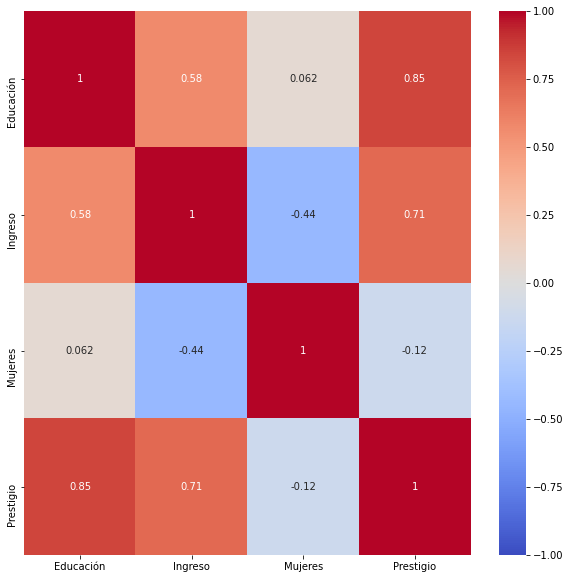

In [15]:
#Mapa de calor de la matriz de correlación obtenida a partir de los datos de las variables numéricas
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.show()

* Con esta gráfica podemos notar que existe una correlación positiva entre `Educación` y el resto de los campos. La correlación entre `Educación` y `Prestigio` es la más grande y tiene un valor de 0.85. 
* Por otra parte, las correlaciones que la variable `Ingreso` tiene con `Educación` y con `Prestigio` son ambas positivas.

Los dos hechos anteriores indican que las ocupaciones más prestigiosas son aquellas que requieren un mayor nivel educativo y que perciben ingresos mayores.

* Es destacable que, a pesar de que ésta sea positiva, la correlación que tiene `Educación` con `Mujeres` es mucho menor que las demás correlaciones.
* Además, las correlaciones que la variable `Mujeres` tiene con `Ingreso` y `Prestigio` son negativas.

Estos dos hechos aseguran que las mujeres en 1971 tenían que batallar más que los hombres para poder tener un trabajo que les brindara buen ingreso, que fuera percibido como prestigioso y que no estuviera clasificado como ocupación femenina.

<!-- Correlación positiva eduación - todo -->
<!-- Correlación ingreso es positiva para todo menos para Mujeres :(
Correlación negativa mujeres - todo
Correlación prestigio es positiva para todo menos para Mujeres :( -->


In [16]:
def plot(df, x_col, y_col, label, targets, colors, size_col = None):
    """
    Función para graficar histogramas o diagramas de dispersión 
    (dependiendo de si `x_col` es igual a `y_col` o no) 
    a partir de los datos del DataFrame `df`, 
    separando los datos dependiendo de los valores que tome la variable `label`
    """
    def normalize(l):
        max_val = max(l)
        min_val = min(l)

        return [(x-min_val)/(max_val - min_val) for x in l]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_xlabel(x_col,fontsize=20)
    
    #removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if x_col == y_col:
        ax.set_ylabel("Frecuencia", fontsize=20)
        ax.set_title("Histograma de " + x_col + " por tipo de ocupación",fontsize=20)
        
        kwargs = dict(alpha=0.6, bins=100)

        for target, color in zip(targets,colors):
            indicesToKeep = df[label] == target
            ax.hist(df.loc[indicesToKeep, x_col], color = color, alpha = 0.6, bins = 15)
    else:
        if size_col:
            size = 100 + np.dot(normalize(df[size_col]), 600)
            
        #print(size)
        ax.set_ylabel(y_col, fontsize=20)
        ax.set_title(y_col + " vs. " + x_col,fontsize=20)

        for target, color in zip(targets,colors):
            indicesToKeep = df[label] == target
            s = size[indicesToKeep] if size_col else 100
            ax.scatter(df.loc[indicesToKeep, x_col], 
                        df.loc[indicesToKeep, y_col], c = color, s = s, alpha = 0.6)

        #for i, txt in enumerate(df["Ocupación"]):
        #    plt.annotate(txt, (df.loc[i, x_col]-0.65, df.loc[i, y_col]-0.05), fontsize = 6)
    
    ax.legend(targets,prop={'size': 15})
    plt.show()

In [17]:
label = "Tipo"
targets = ["Profesional, gerencial y técnico", "Obrero", "Oficinista"]
colors = ["#000000", "#804e12", "#bababa"]
#colors = ["green", "red", "blue"]
columns = df.columns[range(1,len(df.columns)-1)]

Ahora vamos a presentar algunas gráficas que llamaron nuestra atención.

## Educación

En el conjunto de datos hay 44 ocupaciones del tipo `Obrero`, 31 ocupaciones del tipo `Profesional, gerencial y técnico` y 23 ocupaciones del tipo `Oficinista`

In [30]:
df.filter(["Ocupación", "Tipo"]).groupby('Tipo').count()

,Ocupación
Tipo,
Obrero,44
Oficinista,23
"Profesional, gerencial y técnico",31


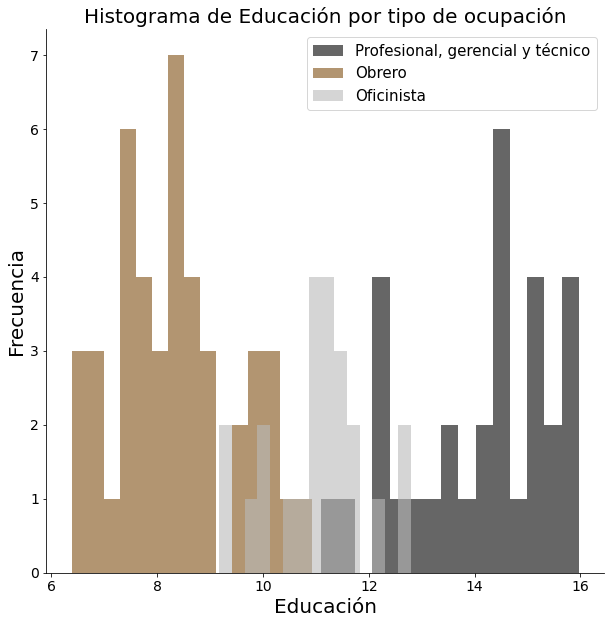

In [19]:
plot(df, "Educación", "Educación", label, targets, colors)

Esta gráfica nos muestra la cantidad de empleados que había clasificados por tipo y dependiendo del nivel de educación. 

Podemos observar que la mayoría de los empleados son obreros y que su nivel de educación no es muy alta.

También podemos ver que los que los que tienen una ocupación de tipo profesional, gerencial o técnico son los que tienen mayor número de estudios.

Finalmente, vemos que la ocupación de oficinita es la que se da con menos frecuencia de las tres ocupaciones y que su nivel educativo se encuentra entre los otros dos tipos de ocupaciones.

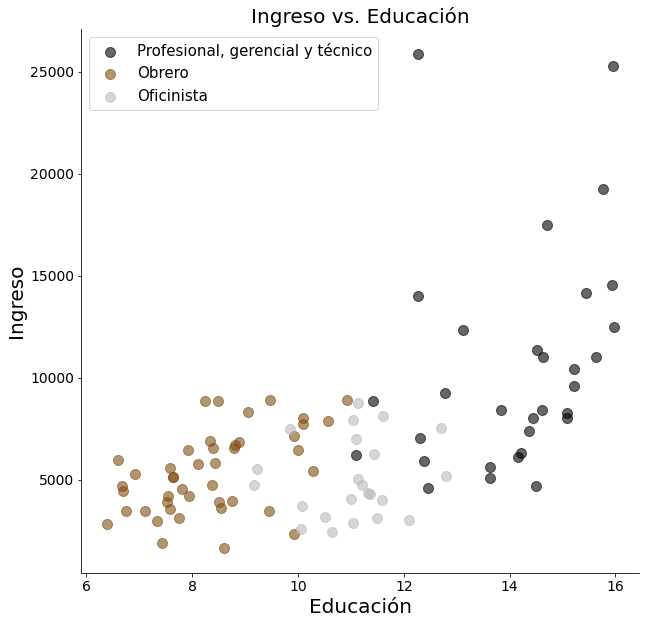

In [20]:
plot(df, "Educación", "Ingreso", label, targets, colors)

Como vimos anteriormente, la educación tiene una correlación positiva con el ingreso de 0.58. Lo cual se puede comprobar visualmente. Mientras más educación, se tiene un tipo de ocupación más elevada y con ello un mejor ingreso.


## Ingreso

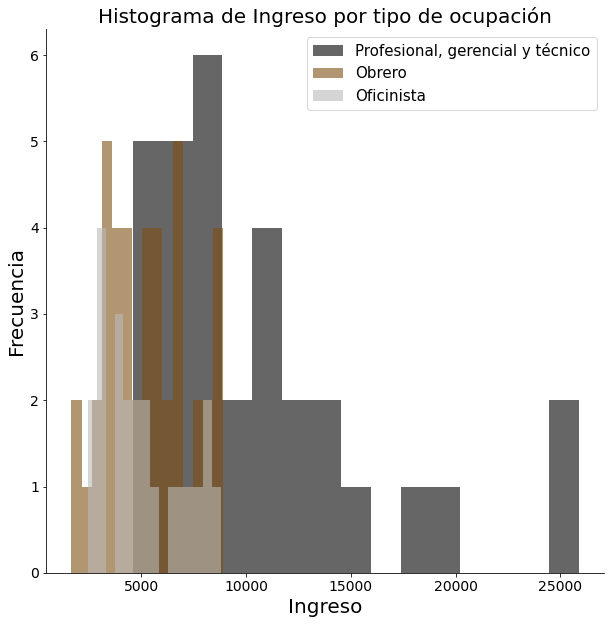

In [21]:
plot(df, "Ingreso", "Ingreso", label, targets, colors)

En esta gráfica podemos visualizar que las personas que tienen el ingreso más alto son muy escasas, mientras que la mayoría de los casos, su ingreso está entre los 5000 y 8000 dólares.

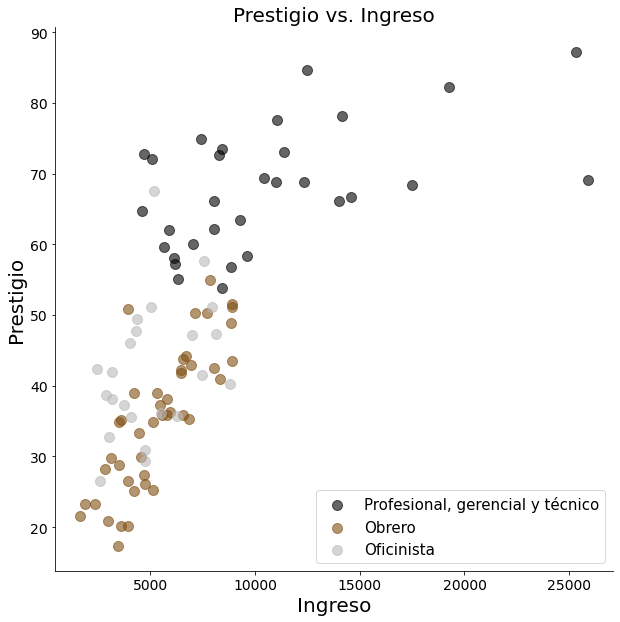

In [22]:
plot(df, "Ingreso", "Prestigio", label, targets, colors)

Con esta gráfica podemos confirmar la correlación positiva entre el ingreso y el prestigio, la cual es de 0.71. También vemos que la ocupación con más prestigio son las profesionales, gerenciales y técnicas.


## Mujeres

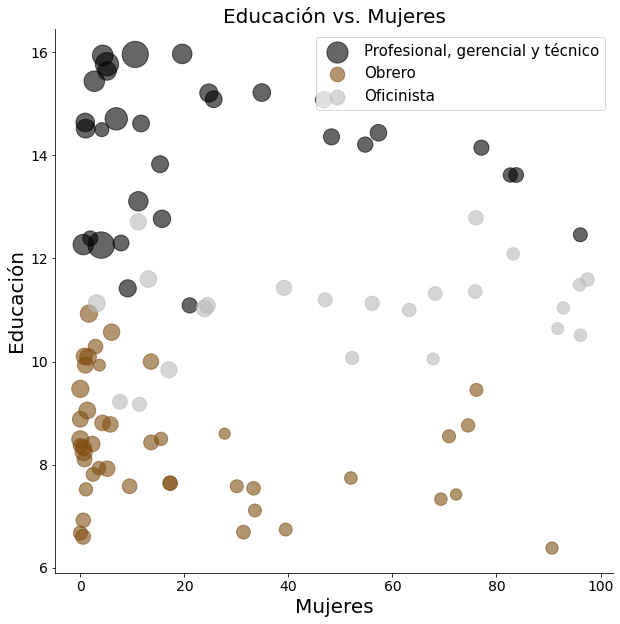

In [23]:
plot(df, "Mujeres", "Educación", label, targets, colors, size_col = "Ingreso")

En esta gráfica comparamos el nivel de educación de las mujeres, con el tipo de ocupación que tienen. Además, el tamaño del diámetro de la bolita depende del ingreso que tienen. 

Así podemos ver que en la ocupación de oficista es en donde es mayor la cantidad de mujeres, pero el ingreso no cambia mucho respecto a la ocupación de obrero.

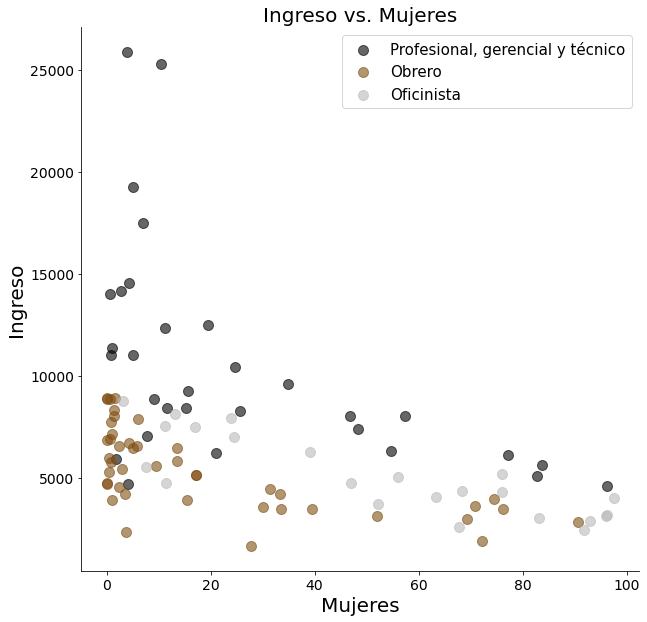

In [24]:
plot(df, "Mujeres", "Ingreso", label, targets, colors)

Aquí podemos observar más claramente que las mujeres se concentran en las ocupaciones de menor Ingreso

## Prestigio

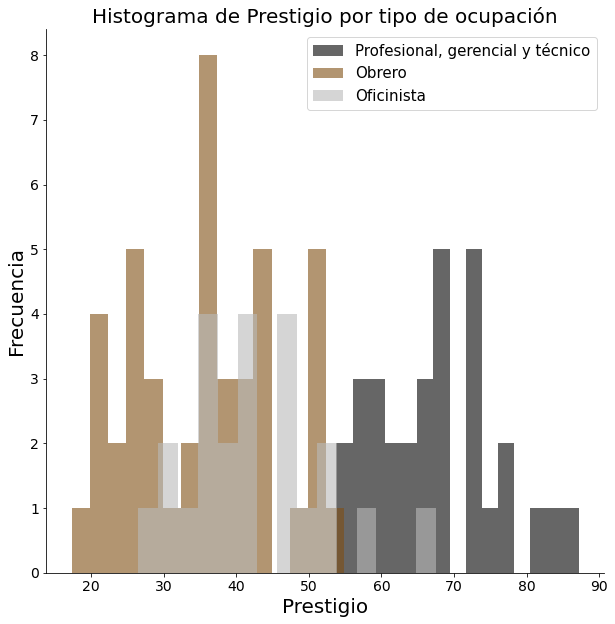

In [26]:
plot(df, "Prestigio", "Prestigio", label, targets, colors)

Aquí podemos observar que las ocupaciones que son más demandadas son la que tienen un prestigio no muy alto. También podemos ver que las ocupaciones más prestigiosas son del tipo profesional, gerencial y técnico y que, aunque haya un empalme entre las ocupaciones del tipo obrero y oficinista, las últimas tienen un prestigio ligeramente mayor que las primeras.

## 2. Clasifique las variables en cuantitativas o cualitativas (a su vez, en discretas o continuas).

El conjunto de datos cuenta con tres variables cualitativas y cinco variables cuantitativas:

* **Cualitativas**: Tipo, Ocupación, Censo*
* **Cuantitativas**:
    * *Discretas*: Ingreso
    * *Continuas*: Educación, Mujeres, Prestigio
    
*Aunque la variable Censo sea numérica, se etiquetó como cualitativa porque no es más que un identificador de las entradas en el conjunto de datos.

## 3. ¿Identifica alguna relación entre prestigio y el nivel educativo?

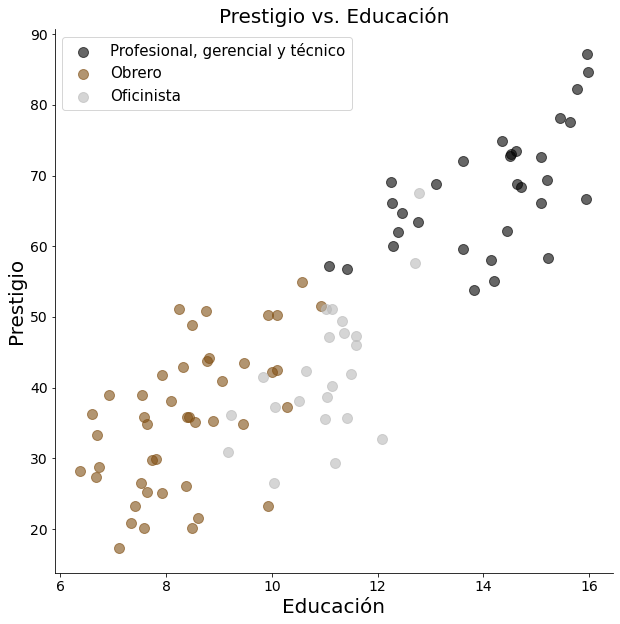

In [27]:
plot(df, "Educación", "Prestigio", label, targets, colors)

Sí, podemos ver que a mayor nivel de educación, mayor es el nivel de prestigio. La correlación con un valor de 0.85 entre estas dos variables también respalda esta afirmación.